In [188]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# Import data 
Train_data= pd.read_csv('titanic/train.csv')
df_test= pd.read_csv('titanic/test.csv')
df_gender_submission= pd.read_csv('titanic/gender_submission.csv')
# Print first few rows
Train_data

# Check missing data percentage
print("Missing value percentages by variable")
Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Missing value percentages by variable


Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [107]:
# Check data types
Train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [118]:
# check the unique values count
print("Number of unique values in each columns")
for col in Train_data.columns:
    print(str(col)+ "   " + str(Train_data[col].nunique()))



number of unique values in each columns
PassengerId   891
Survived   2
Pclass   3
Name   891
Sex   2
Age   88
SibSp   7
Parch   7
Ticket   681
Fare   248
Cabin   147
Embarked   3


In [162]:
# dropping unimportant columns
#Train_data.drop('Name',axis=1)
#Train_data.drop('Ticket',axis=1)
#Train_data.drop('PassengerId',axis=1)
#Train_data.drop('Cabin',axis=1)
#Train_data.drop('Embarked',axis=1)
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [163]:
# Print column names
list(Train_data.columns)
Train_data[['Age']] = Train_data[['Age']].fillna(value=Train_data.mean(skipna=True, numeric_only=True))
Train_data[['Age']] = Train_data[['Age']].round()

In [138]:
# Replace missing values with mode of the Embarked column
#Train_data['Embarked'] = Train_data['Embarked'].fillna(Train_data['Embarked'].mode()[0])
#Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

# OR can drop the missing rows
Train_data = Train_data.drop(Train_data.loc[Train_data.get("Embarked").isna()].index)
# See if there is still any missing data in train dataset
print("Missing values remaining in the data set")
Train_data.isna().sum().max()

Missing values remaining in the data set


687

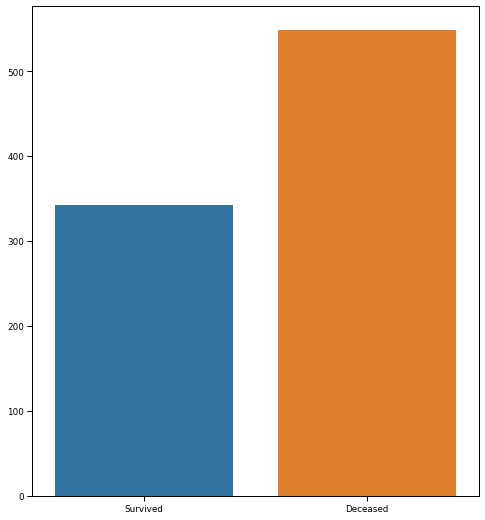

In [165]:
plt.figure(figsize=(8, 9))
survival_labels = ["Survived", "Deceased"]
survival_counts = [Train_data.Survived.value_counts()[1], Train_data.Survived.value_counts()[0]]
sns.barplot(x= survival_labels, y = survival_counts)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

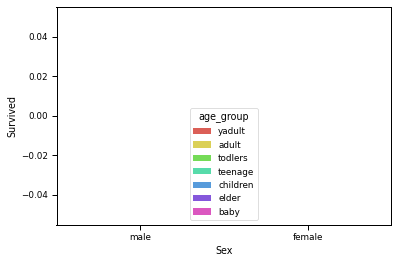

In [166]:
Train_data.loc[Train_data['Age'] <= 1, 'age_group'] = 'baby'
Train_data.loc[Train_data['Age'].between(1,3), 'age_group'] = 'todlers'
Train_data.loc[Train_data['Age'].between(4,10), 'age_group'] = 'children'
Train_data.loc[Train_data['Age'].between(11,19), 'age_group'] = 'teenage'
Train_data.loc[Train_data['Age'].between(20,35), 'age_group'] = 'yadult'
Train_data.loc[Train_data['Age'].between(36,60), 'age_group'] = 'adult'
Train_data.loc[Train_data['Age']>60, 'age_group'] = 'elder'

# create plot
sns.barplot(x = 'Sex', y = 'Survived',  hue = 'age_group',data = Train_data,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )


In [105]:
Train_data.loc[Train_data['Age'].round() <= 10, 'mean_age'] = 5
Train_data.loc[Train_data['Age'].round().between(11,20), 'mean_age'] = 15
Train_data.loc[Train_data['Age'].round().between(21,30), 'mean_age'] = 25
Train_data.loc[Train_data['Age'].round().between(31,40), 'mean_age'] = 35
Train_data.loc[Train_data['Age'].round().between(41,50), 'mean_age'] = 45
Train_data.loc[Train_data['Age'].round().between(51,60), 'mean_age'] = 55
Train_data.loc[Train_data['Age'].round().between(61,70), 'mean_age'] = 65
Train_data.loc[Train_data['Age'].round().between(71,80), 'mean_age'] = 75
Train_data.loc[Train_data['Age'] > 80, 'mean_age'] = 85
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,mean_age
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,yadult,25.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,adult,35.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,yadult,25.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,yadult,35.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,yadult,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S,yadult,25.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S,teenage,15.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S,yadult,25.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,yadult,25.0


In [90]:
Train_data['Age'].unique()
# Check missing data percentage
Train_data.isnull()
Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
age_group      0.0
dtype: float64

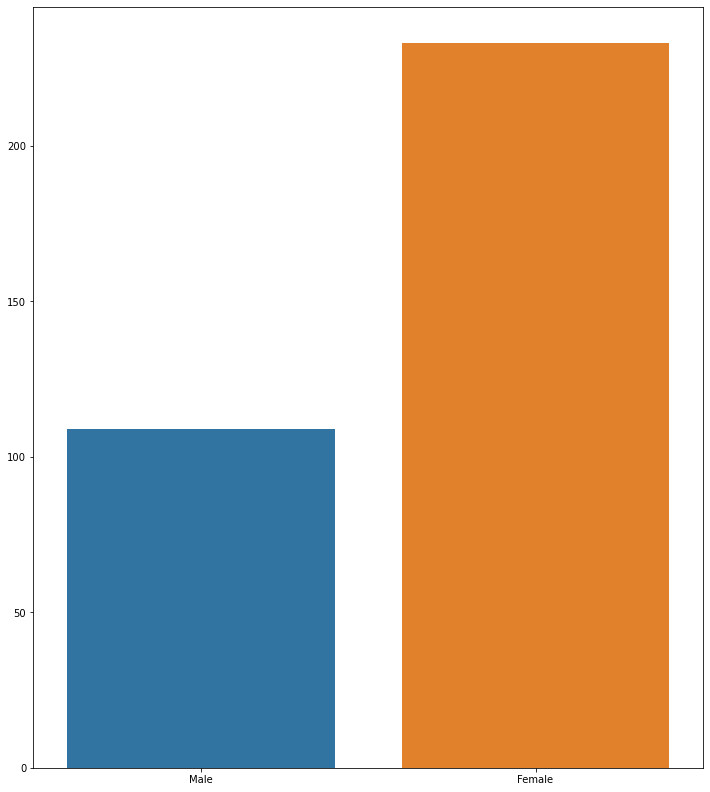

In [102]:
gender_labels = ["Male", "Female"]
gender_survival_counts = [len(Train_data[(Train_data.Survived == 1) & (Train_data.Sex == 1)]), len(Train_data[(Train_data.Survived == 1) & (Train_data.Sex == 0)])]
plt.figure(figsize=(12, 14))
sns.barplot(x = gender_labels, y = gender_survival_counts)
plt.show()
print('''It is clear from the graph that there are more servival rate in females than males
Therefore, sex is identified as a good variable for classification''')

It is clear from the graph that there are more servival rate in first class than second class
Similarly, there are more servival rate in second class  than third class


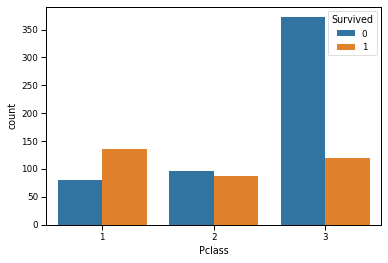

In [177]:
sns.countplot(x=Train_data['Pclass'], hue=Train_data['Survived'])
print('''It is clear from the graph that there are more servival rate in first class than second class
Similarly, there are more servival rate in second class  than third class
Therefore, pasenger class is a good variable for classification''')

In [173]:
# Check if there is data variation between passenger class and servival
Train_data['Survived'].groupby(Train_data['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Name_Title', ylabel='count'>

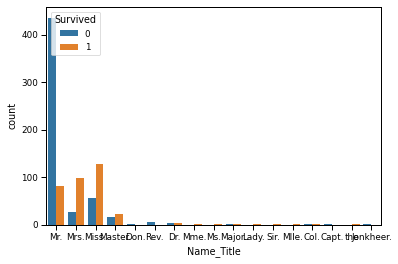

In [181]:
Train_data['Name_Title'] = Train_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

Train_data['Name_Title'].value_counts()
sns.countplot(x=Train_data['Name_Title'], hue=Train_data['Survived'])

In [184]:
train_rf = Train_data

train_rf['Survived'] = train_rf['Survived'].astype(object)
train_rf['Pclass'] = train_rf['Pclass'].astype(object)
train_rf['Sex'] = train_rf['Sex'].astype(object)
train_rf.loc[train_rf['Age'] <= 1, 'age_group'] = 'baby'
train_rf.loc[train_rf['Age'].between(1,3), 'age_group'] = 'todlers'
train_rf.loc[train_rf['Age'].between(4,10), 'age_group'] = 'children'
train_rf.loc[train_rf['Age'].between(11,19), 'age_group'] = 'teenage'
train_rf.loc[train_rf['Age'].between(20,35), 'age_group'] = 'yadult'
train_rf.loc[train_rf['Age'].between(36,60), 'age_group'] = 'adult'
train_rf.loc[train_rf['Age']>60, 'age_group'] = 'elder'
train_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_Title   891 non-null    object 
 13  age_group    714 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 97.6+ KB


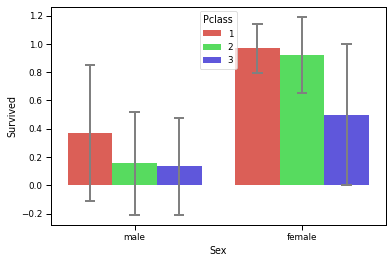

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Title,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,yadult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,yadult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,yadult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,yadult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.,yadult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,teenage
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,yadult


In [186]:
# create plot
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = Train_data,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd')


plt.show()
Train_data

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)'''

The data can be converted to numeric type inorder to use algorithms that use only numeric variables

In [ ]:
Train_data_numeric = Train_data
# Convert sex variable to numeric values
Train_data_numeric['Sex'] = Train_data_numeric['Sex'].replace(['female','male'],[0,1])
Train_data_numeric

Family class with parent and children

SibSp: number of siblings/spouse

Parch: number of childre/parents

With the number of siblings or spouse and the number of children or parents we can create new class called Family.

In [206]:
# Get pasengers who travel with family (either siblings,spouse, childre or parents)
# Get the rows which has values for either SibSp column or Parch
Train_data_families = Train_data.loc[(Train_data['SibSp'] > 0) | (Train_data['Parch'] > 0)]
Train_data_families

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [207]:
def extract_last_name(x):
    # String x will split by ',' and take the first element in the resulting list. 
    # Then any whitespaces at the front and end of the first element will be truncated and returned
    return x.split(",")[0].strip() 


In [238]:
Train_data_families["LastName"] = Train_data_families["Name"].apply(extract_last_name)
list_of_n_members = Train_data_families.groupby(['LastName']).size()
# Print family names and the list of names with that family name
lastname_list = list(Train_data_families["LastName"].unique())
print(lastname_list)

['Braund', 'Cumings', 'Futrelle', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Andersson', 'Rice', 'Vander Planke', 'Asplund', 'Fortune', 'Spencer', 'Meyer', 'Holverson', 'Nicola-Yarred', 'Ahlin', 'Turpin', 'Laroche', 'Lennon', 'Samaan', 'Arnold-Franchi', 'Panula', 'Harper', 'Faunthorpe', 'Ostby', 'West', 'Goodwin', 'Harris', 'Skoog', 'Moubarek', 'Kink', 'Chronopoulos', 'Caldwell', 'Backstrom', 'Ford', 'Chaffee', 'Dean', 'Greenfield', 'Doling', 'Kantor', 'White', 'Gustafsson', 'Moran', 'Zabour', 'Jussila', 'Baxter', 'Hickman', 'Peter', 'Robins', 'Weisz', 'Newsom', 'Boulos', 'Hakkarainen', 'Nicholls', 'Navratil', 'Pears', 'van Billiard', 'Williams', 'Sage', 'Cribb', 'Goldsmith', 'Chibnall', 'Klasen', 'Lefebre', 'Becker', 'Kink-Heilmann', "O'Brien", 'Bourke', 'Andersen-Jensen', 'Olsen', 'Strom', 'Kiernan', 'Newell', 'Jacobsohn', 'Hoyt', 'Hold', 'Collyer', 'Murphy', 'Minahan', 'Hamalainen', 'Beckwith', 'Carter', 'Lobb', 'Rosblom', 'Touma', 'Parrish', 'Taussig', 'Persson', 'Graham', 'Mell

/var/folders/vj/796j6ms967z0rkptghjx57zm0000gn/T/ipykernel_23514/2347170333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data_families["LastName"] = Train_data_families["Name"].apply(extract_last_name)


In [229]:
with_family_list = list(zip(Train_data_families["Survived"], Train_data_families["Pclass"],Train_data_families["Name"],Train_data_families["Sex"],
Train_data_families["Age"],Train_data_families["SibSp"],Train_data_families["Parch"],Train_data_families["Ticket"],Train_data_families["LastName"]))
#print (tuples)
for i in tuples:
    

[(0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0, 'A/5 21171', 'Braund'), (1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', 38.0, 1, 0, 'PC 17599', 'Cumings'), (1, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', 35.0, 1, 0, '113803', 'Futrelle'), (0, 3, 'Palsson, Master. Gosta Leonard', 'male', 2.0, 3, 1, '349909', 'Palsson'), (1, 3, 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', 27.0, 0, 2, '347742', 'Johnson'), (1, 2, 'Nasser, Mrs. Nicholas (Adele Achem)', 'female', 14.0, 1, 0, '237736', 'Nasser'), (1, 3, 'Sandstrom, Miss. Marguerite Rut', 'female', 4.0, 1, 1, 'PP 9549', 'Sandstrom'), (0, 3, 'Andersson, Mr. Anders Johan', 'male', 39.0, 1, 5, '347082', 'Andersson'), (0, 3, 'Rice, Master. Eugene', 'male', 2.0, 4, 1, '382652', 'Rice'), (0, 3, 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'female', 31.0, 1, 0, '345763', 'Vander Planke'), (0, 3, 'Palsson, Miss. Torborg Danira', 'female', 8.0, 3, 1, '349909', 'Palsson'), 

In [211]:

'''class family:
    _surname_
'''
Train_data_families   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Abelson
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Potter
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Shelley
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Rice
